# Prep

In [1]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
import torch.nn.functional as F
from torch.optim.lr_scheduler import LinearLR

In [2]:
import models
from experiments import perform_test
from data_preparation import gen_files

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [5]:
# path to train dir

train_dir = r"C:\Users\rafci\Desktop\tensorflow-speech-recognition-challenge\train"
if not os.path.exists(train_dir):
    train_dir = r"C:\Users\jakub\Desktop\PD\sem10\deep\tensorflow-speech-recognition-challenge\train"

In [6]:
# run once to generate dataset files

# gen_files(train_dir)

In [7]:
# reading data from generated files 
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")

X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))

classes = os.listdir(train_dir+'/audio/')

def convert_list_dict(lst):
    res_dct = {i: val for i, val in enumerate(lst)}
    return res_dct
         
classes_index = convert_list_dict(classes)
INPUT_SHAPE = (85, 122)
CLASSES_COUNT = len(classes)

In [8]:
# creating datasets
y_train = torch.tensor(y_train).long()
y_val = torch.tensor(y_val).long()
X_train = torch.tensor(X_train)
X_val = torch.tensor(X_val)

y_train = F.one_hot(y_train, num_classes = CLASSES_COUNT)

train_data = TensorDataset(X_train.float().transpose(2, 1), y_train.float())
valid_data = TensorDataset(X_val.float().transpose(2, 1), y_val.float())

### params

In [9]:
num_epochs = 10
batch_size = 64
lr = 0.01
weight_decay = 1e-8

In [10]:
# trans params
num_heads=5
ffn_dim=256
num_layers = 4
dropout = 0

# inception params
num_filters = 32
use_residual = True
use_bottleneck = True
depth = 10
kernel_size = 41
bottleneck_size = 32 * 4

# Tests

## Model tests

### Inception test

In [11]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = None

Epoch [1/10], Train loss: 0.0012
Test accuracy: 0.8738119608129844
Epoch [2/10], Train loss: 0.0005
Test accuracy: 0.9187015645562217
Epoch [3/10], Train loss: 0.0009
Test accuracy: 0.9330311449042258
Epoch [4/10], Train loss: 0.0006
Test accuracy: 0.9473607252522298
Epoch [5/10], Train loss: 0.0006
Test accuracy: 0.9488229273285568
Epoch [6/10], Train loss: 0.0004
Test accuracy: 0.9508700102354145
Epoch [7/10], Train loss: 0.0007
Test accuracy: 0.9537944143880684
Epoch [8/10], Train loss: 0.0002
Test accuracy: 0.9552566164643954
Epoch [9/10], Train loss: 0.0003
Test accuracy: 0.9540868548033338
Epoch [10/10], Train loss: 0.0002
Test eval:
              precision    recall  f1-score   support

         yes     0.9434    0.9579    0.9506       261
          no     0.9194    0.9296    0.9245       270
          up     0.7898    0.9538    0.8641       260
        down     0.9570    0.9280    0.9423       264
        left     0.9170    0.9838    0.9492       247
       right     0.8885    

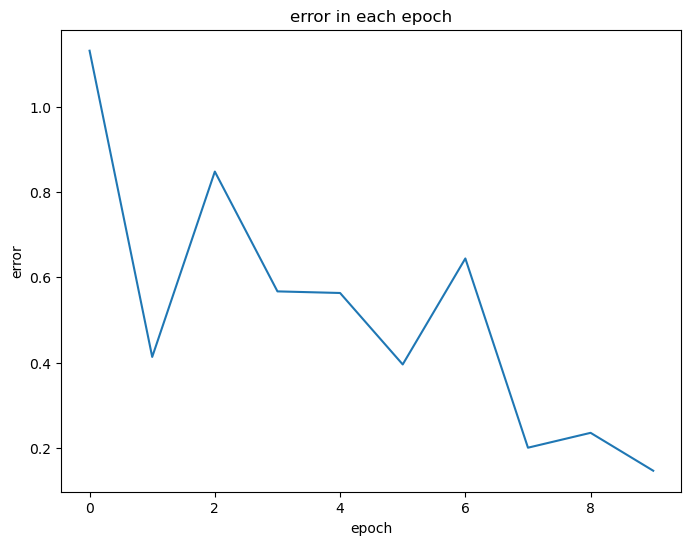

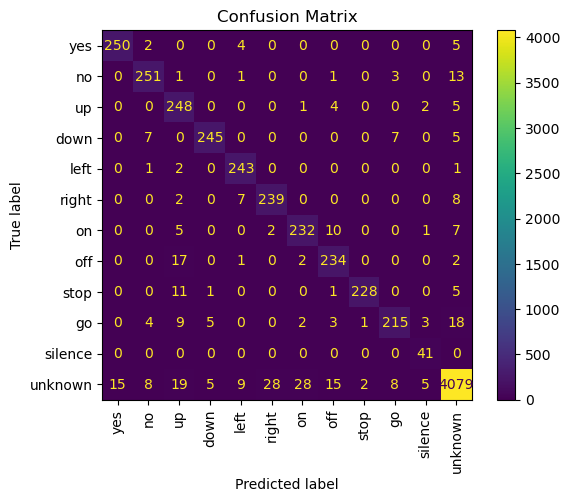

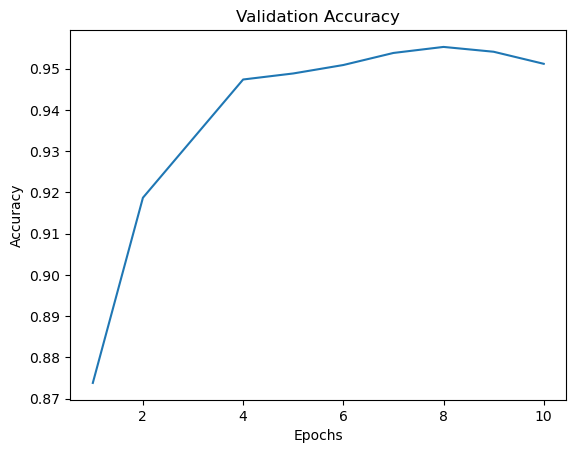

In [12]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False)

### Mod Inception test

In [11]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = LinearLR(optimizer = optimizer, start_factor = 1.0, end_factor = 0.01, total_iters = num_epochs)

Epoch [1/10], Train loss: 0.0011
Test accuracy: 0.9109518935516888
Epoch [2/10], Train loss: 0.0008
Test accuracy: 0.9295218599210411
Epoch [3/10], Train loss: 0.0005
Test accuracy: 0.9387337330019009
Epoch [4/10], Train loss: 0.0006
Test accuracy: 0.9498464687819856
Epoch [5/10], Train loss: 0.0006
Test accuracy: 0.9518935516888434
Epoch [6/10], Train loss: 0.0004
Test accuracy: 0.9508700102354145
Epoch [7/10], Train loss: 0.0009
Test accuracy: 0.9559877175025588
Epoch [8/10], Train loss: 0.0004
Test accuracy: 0.9586196812399473
Epoch [9/10], Train loss: 0.0001
Test accuracy: 0.9571574791636204
Epoch [10/10], Train loss: 0.0001
Test eval:
              precision    recall  f1-score   support

         yes     1.0000    0.9425    0.9704       261
          no     0.9176    0.9074    0.9125       270
          up     0.7771    0.9654    0.8611       260
        down     0.9715    0.9053    0.9373       264
        left     0.9269    0.9757    0.9507       247
       right     0.9841    

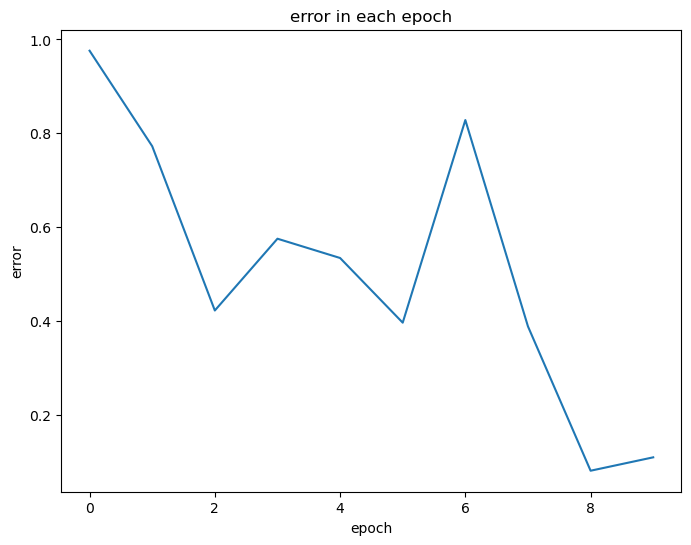

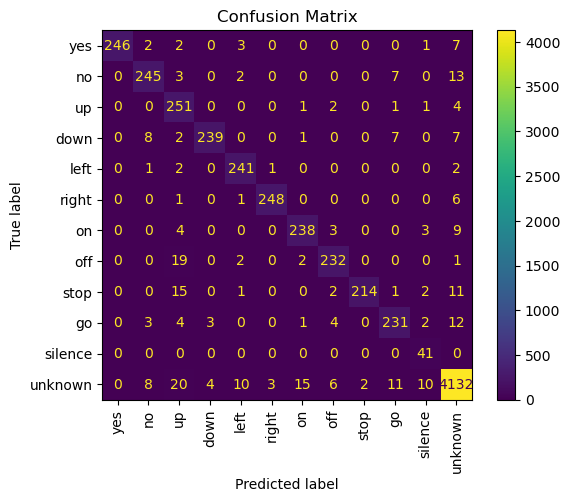

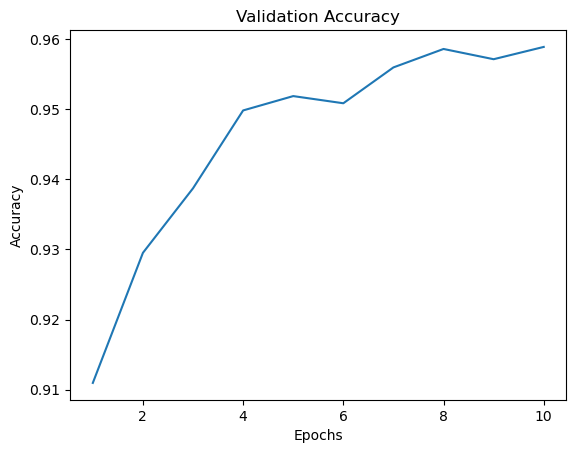

In [12]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False)

### Conformer test

In [13]:
model = models.ConformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = None

Epoch [1/10], Train loss: 0.0005
Test accuracy: 0.9308378417897354
Epoch [2/10], Train loss: 0.0003
Test accuracy: 0.9406345957011258
Epoch [3/10], Train loss: 0.0002
Test accuracy: 0.9489691475361896
Epoch [4/10], Train loss: 0.0004
Test accuracy: 0.9486767071209241
Epoch [5/10], Train loss: 0.0004
Test accuracy: 0.9439976604766779
Epoch [6/10], Train loss: 0.0001
Test accuracy: 0.9426816786079836
Epoch [7/10], Train loss: 0.0002
Test accuracy: 0.9460447433835356
Epoch [8/10], Train loss: 0.0004
Test accuracy: 0.9517473314812107
Epoch [9/10], Train loss: 0.0001
Test accuracy: 0.946775844421699
Epoch [10/10], Train loss: 0.0000
Test eval:
              precision    recall  f1-score   support

         yes     0.9960    0.9464    0.9705       261
          no     0.8830    0.9222    0.9022       270
          up     0.8647    0.8846    0.8745       260
        down     0.9706    0.8750    0.9203       264
        left     0.8910    0.9595    0.9240       247
       right     0.9677    0

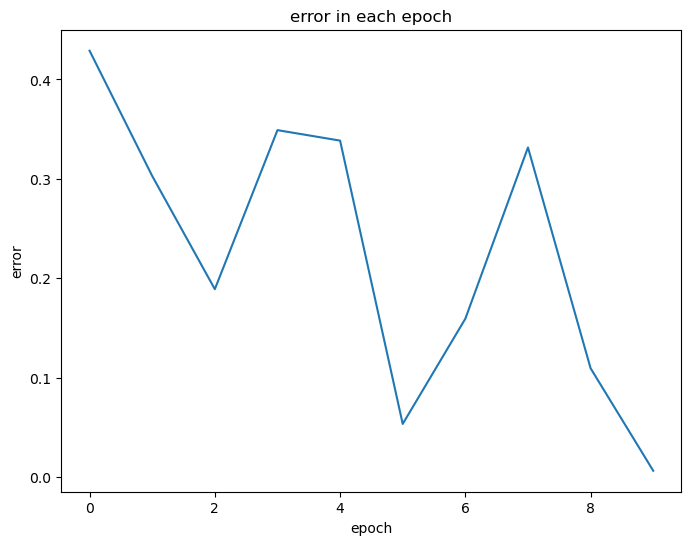

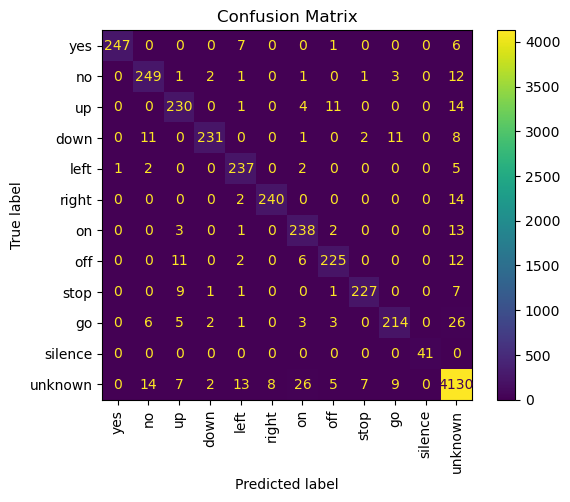

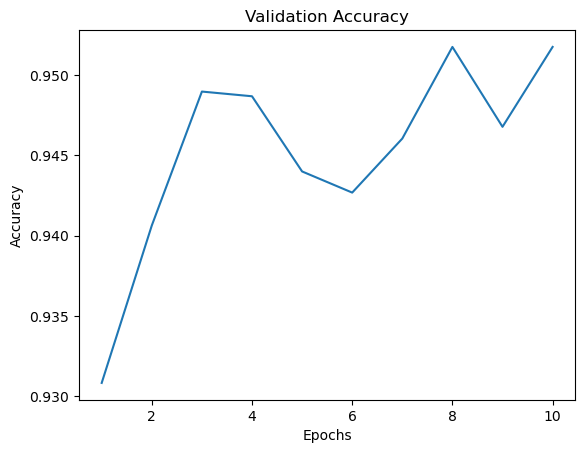

In [14]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes = classes_index,
                     trans_mode = True)

### Emformer test

In [15]:
model = models.EmformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = None

Epoch [1/10], Train loss: 0.0026
Test accuracy: 0.7816932300043866
Epoch [2/10], Train loss: 0.0019
Test accuracy: 0.8390115513964029
Epoch [3/10], Train loss: 0.0015
Test accuracy: 0.8660622898084516
Epoch [4/10], Train loss: 0.0012
Test accuracy: 0.8850709168007018
Epoch [5/10], Train loss: 0.0010
Test accuracy: 0.8939903494662963
Epoch [6/10], Train loss: 0.0005
Test accuracy: 0.892674367597602
Epoch [7/10], Train loss: 0.0006
Test accuracy: 0.8856557976312326
Epoch [8/10], Train loss: 0.0007
Test accuracy: 0.8890188624067846
Epoch [9/10], Train loss: 0.0001
Test accuracy: 0.8985231759029098
Epoch [10/10], Train loss: 0.0004
Test eval:
              precision    recall  f1-score   support

         yes     0.8531    0.9349    0.8921       261
          no     0.8566    0.8185    0.8371       270
          up     0.7134    0.8423    0.7725       260
        down     0.8253    0.8409    0.8330       264
        left     0.8560    0.8421    0.8490       247
       right     0.8071    0

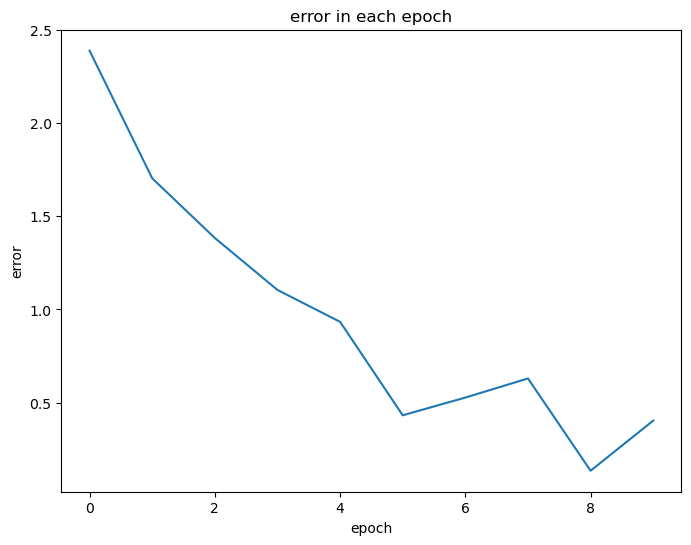

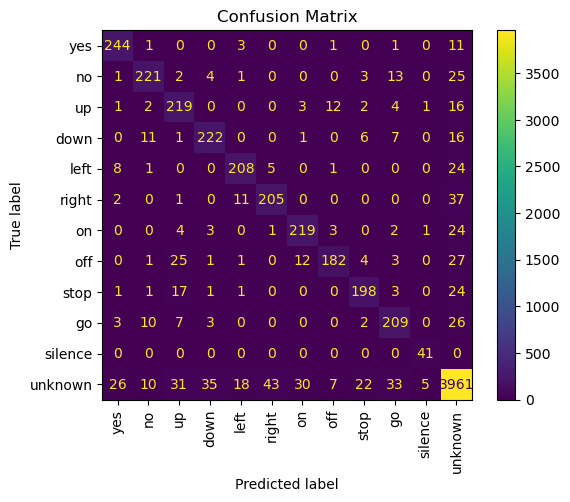

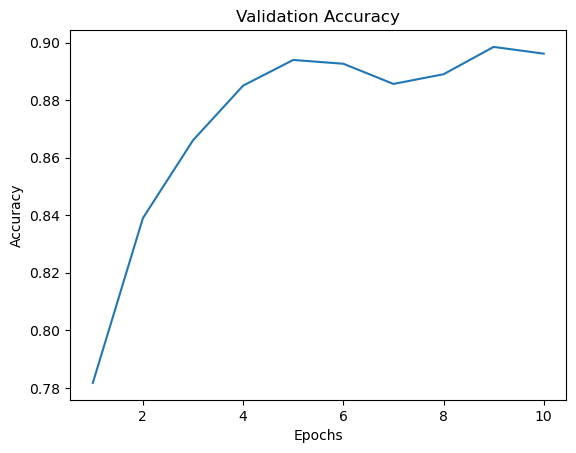

In [16]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes = classes_index,
                     trans_mode = True)

## Approaches tests

In [ ]:
# TODO

## Augmentation tests

In [ ]:
# TODO

## Hyperparametres tests

In [ ]:
# TODO